In [1]:
import os
os.chdir('/Users/lukastaylor/Dropbox/ECON 5813/Project')
%matplotlib inline


In [2]:
import numpy as np 
import pandas as pd 
import math 
from time import sleep
from tqdm import tqdm
from tqdm.notebook import tqdm
import sys
import time

raw0 = pd.read_csv('vaccine data2.csv')
raw1 = pd.read_csv('deaths data.csv')
raw2 = pd.read_csv('county info.csv')
for n in range(0,3283):
    raw0.iloc[n,1] = raw0.iloc[n,1] + " " + raw0.iloc[n,0]
for n in range(0,3086):
    raw1.iloc[n,1] = raw1.iloc[n,1] + " " + raw1.iloc[n,0]

In [3]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
for p in range (0, 3142):
    raw2.iloc[p,0]=us_state_to_abbrev.get(raw2.iloc[p,0])

for n in range(0,3142):
    raw2.iloc[n,1] = raw2.iloc[n,0] + " " + raw2.iloc[n,1]

In [4]:
county = []
ruralurban = []
deaths = []
dose1 = []
series = []
booster = []
pop = []
hsgrad = []
homeownership = []
under5 = []
over65 = []
female = []
black = []
white = []
percapincome = []
density = []
age = []
def doWork():
    for i in range (0,raw1.shape[0]-1):
        if raw0.iloc[n,1] == raw1.iloc[i,1]:
            start=i-200
            end=i+200
            if start < 0:
                start = 0
            elif end > raw2.shape[0]-1:
                end = raw2.shape[0]-1
            for d in range(start,end):
                if raw0.iloc[n,1] == raw2.iloc[d,1]:
                    hsgrad.append(raw2.iloc[d,2])
                    homeownership.append(raw2.iloc[d,3])
                    under5.append(raw2.iloc[d,4])
                    over65.append(raw2.iloc[d,5])
                    female.append(raw2.iloc[d,6])
                    black.append(raw2.iloc[d,7])
                    white.append(raw2.iloc[d,8])
                    percapincome.append(raw2.iloc[d,9])
                    density.append(raw2.iloc[d,11])
                    age.append(raw2.iloc[d,14])
                    county.append(raw0.iloc[n,1])
                    ruralurban.append(raw1.iloc[i,2])
                    deaths.append(raw1.iloc[i,3])
                    dose1.append(raw0.iloc[n,2])
                    series.append(raw0.iloc[n,3])
                    booster.append(raw0.iloc[n,4])
                    pop.append(raw0.iloc[n,5])
                    return
for n in range (0,raw0.shape[0]-1):
    doWork()
    if n==round(raw0.shape[0]/3, 0):
        print("33% done")
    elif n==round(2*raw0.shape[0]/3, 0):
        print("66% done")

33% done
66% done


In [5]:
deathspercap = []
for p in range(0,len(deaths)):
    #x = float(deaths[p])
    #if math.isnan(x):
        #y=0
    #else:
    deathspercap.append(deaths[p]/pop[p])

In [6]:
def popout(p):
    county.pop(p)
    ruralurban.pop(p)
    deaths.pop(p)
    dose1.pop(p)
    series.pop(p)
    booster.pop(p)
    pop.pop(p)
    deathspercap.pop(p)

    hsgrad.pop(p)
    homeownership.pop(p)
    under5.pop(p)
    over65.pop(p)
    female.pop(p)
    black.pop(p)
    white.pop(p)
    percapincome.pop(p)
    density.pop(p)
    age.pop(p)
for p in range(0,len(county)):
    try:
        if not county[p]:
            popout()
            continue

        if not ruralurban[p]:
            popout()
            continue

        b = float(dose1[p])
        if math.isnan(b):
            popout()
            continue

        c = float(series[p])
        if math.isnan(c):
            popout()
            continue

        d = float(booster[p])
        if math.isnan(d):
            popout()
            continue

        e = float(deathspercap[p])
        if math.isnan(e):
            popout()
            continue

        e = float(hsgrad[p])
        if math.isnan(e):
            popout()
            continue
        e = float(homeownership[p])
        if math.isnan(e):
            popout()
            continue
        e = float(under5[p])
        if math.isnan(e):
            popout()
            continue
        e = float(over65[p])
        if math.isnan(e):
            popout()
            continue
        e = float(female[p])
        if math.isnan(e):
            popout()
            continue
        e = float(black[p])
        if math.isnan(e):
            popout()
            continue
        e = float(white[p])
        if math.isnan(e):
            popout()
            continue
        e = float(percapincome[p])
        if math.isnan(e):
            popout()
            continue
        e = float(density[p])
        if math.isnan(e):
            popout()
            continue
        e = float(age[p])
        if math.isnan(e):
            popout()
            continue
    except:
        y=1

In [7]:
q=len(county)
w=len(ruralurban)
e=len(deathspercap)
r=len(dose1)
t=len(series)
y=len(booster)
u=len(pop)
i=len(hsgrad)
o=len(homeownership)
p=len(under5)
a=len(over65)
s=len(female)
d=len(black)
f=len(white)
g=len(percapincome)
h=len(density)
j=len(age)

if q==w==e==r==t==y==u==i==o==p==a==s==d==f==g==h==j:
    print("same dimensions", len(county))
else:
    print("different dimensions")
    print(a)
    print(b)
    print(c)
    print(d)
    print(e)
    print(f)
    print(g)
    print(h)

same dimensions 2833


In [8]:
x=0
for n in deathspercap:
    if n>=1:
        popout(x)
    x=x+1

In [9]:
df = pd.DataFrame(list(zip(county, deathspercap, dose1, series, booster, pop, hsgrad, homeownership, under5, over65, female, black, white, percapincome, density, age)),
               columns =['county','deathspercap', 'dose1','series','booster','pop', 'hsgrad', 'homeownership', 'under5', 'over65', 'female', 'black', 'white', 'percapitaincome', 'density', 'age'])

In [10]:
df=df.dropna()
df

,county,deathspercap,dose1,series,booster,pop,hsgrad,homeownership,under5,over65,female,black,white,percapitaincome,density,age
1,AK Anchorage Municipality,0.002772,79.2,70.6,49.4,268042.0,93.3,61.7,7.4,9.4,49.2,2.74,59.19,38324.82,171.2,33.6
2,AK Bethel Census Area,0.002377,73.9,68.7,51.4,16410.0,80.9,61.3,10.5,7.1,47.7,0.33,10.17,17802.36,0.4,27.3
5,AK Fairbanks North Star Borough,0.002119,71.0,63.8,40.9,89670.0,94.4,59.8,7.8,8.7,47.2,2.12,71.08,34968.82,13.3,31.3
6,AK Juneau City and Borough,0.000597,86.9,79.5,59.4,30167.0,95.6,64.0,5.9,11.3,49.0,0.53,65.41,41254.44,11.6,38.1
7,AK Kenai Peninsula Borough,0.001557,55.5,49.9,51.8,55225.0,92.8,72.7,6.3,14.8,47.6,0.27,80.99,32050.39,3.4,40.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2828,WY Sublette County,0.001182,44.4,38.8,48.7,9306.0,95.3,73.6,6.3,15.3,45.8,0.00,89.23,28810.97,2.1,39.4
2829,WY Sweetwater County,0.002655,61.5,52.4,42.8,39546.0,90.7,73.7,7.2,9.7,47.8,0.41,79.64,30282.59,4.2,35.3
2830,WY Teton County,0.000851,95.0,95.0,50.9,22334.0,95.4,60.8,5.3,12.7,47.4,0.32,81.49,48557.37,5.3,39.3
2831,WY Uinta County,0.001219,62.8,53.6,42.4,18865.0,89.6,73.7,7.5,11.7,49.5,0.07,87.66,27048.12,10.1,35.8


AIC is -22617.82594992152
BIS is -22606.223985779005
R-Squared is -3.180466779717506e-05
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9223
Date:                Wed, 07 Dec 2022   Prob (F-statistic):              0.337
Time:                        14:05:22   Log-Likelihood:                 11311.
No. Observations:                2443   AIC:                        -2.262e+04
Df Residuals:                    2441   BIC:                        -2.261e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

<AxesSubplot:xlabel='dose1', ylabel='deathspercap'>

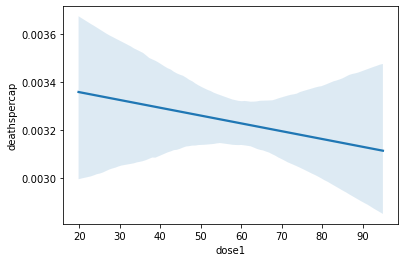

In [11]:
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns


import statsmodels.formula.api as smf
OLS3 = smf.ols('deathspercap ~ dose1', data=df).fit()
print("AIC is", OLS3.aic)
print("BIS is", OLS3.bic)
print("R-Squared is", OLS3.rsquared_adj)
print(OLS3.summary())

sns.regplot(x='dose1', y='deathspercap', data=df, scatter=False)

AIC is -22619.452939716088
BIS is -22607.850975573572
R-Squared is 0.0006339750587316395
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.549
Date:                Wed, 07 Dec 2022   Prob (F-statistic):              0.110
Time:                        14:05:22   Log-Likelihood:                 11312.
No. Observations:                2443   AIC:                        -2.262e+04
Df Residuals:                    2441   BIC:                        -2.261e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

<AxesSubplot:xlabel='series', ylabel='deathspercap'>

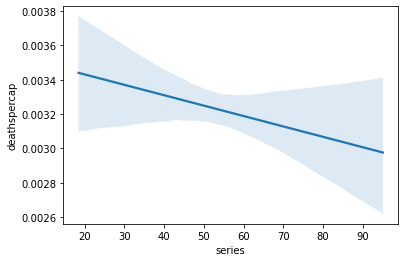

In [12]:
import statsmodels.formula.api as smf
OLS3 = smf.ols('deathspercap ~ series', data=df).fit()
print("AIC is", OLS3.aic)
print("BIS is", OLS3.bic)
print("R-Squared is", OLS3.rsquared_adj)
print(OLS3.summary())
sns.regplot(x='series', y='deathspercap', data=df, scatter=False)

AIC is -22667.235499751892
BIS is -22655.633535609377
R-Squared is 0.019990628493912088
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     50.81
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           1.33e-12
Time:                        14:05:23   Log-Likelihood:                 11336.
No. Observations:                2443   AIC:                        -2.267e+04
Df Residuals:                    2441   BIC:                        -2.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

<AxesSubplot:xlabel='booster', ylabel='deathspercap'>

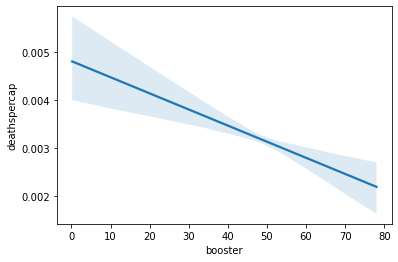

In [13]:
import statsmodels.formula.api as smf
OLS3 = smf.ols('deathspercap ~ booster', data=df).fit()
print("AIC is", OLS3.aic)
print("BIS is", OLS3.bic)
print("R-Squared is", OLS3.rsquared_adj)
print(OLS3.summary())
sns.regplot(x='booster', y='deathspercap', data=df, scatter=False)

In [14]:
OLS3 = smf.ols('deathspercap ~ dose1 + pop + density + percapitaincome', data=df).fit()
print("AIC is", OLS3.aic)
print("BIS is", OLS3.bic)
print("R-Squared is", OLS3.rsquared_adj)
print(OLS3.summary())

AIC is -22631.61456774852
BIS is -22602.60965739223
R-Squared is 0.006815235804644271
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.189
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           0.000367
Time:                        14:05:23   Log-Likelihood:                 11321.
No. Observations:                2443   AIC:                        -2.263e+04
Df Residuals:                    2438   BIC:                        -2.260e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [15]:
OLS3 = smf.ols('deathspercap ~ series + pop', data=df).fit()
print("AIC is", OLS3.aic)
print("BIS is", OLS3.bic)
print("R-Squared is", OLS3.rsquared_adj)
print(OLS3.summary())

AIC is -22625.002099842743
BIS is -22607.59915362897
R-Squared is 0.0033090557256978403
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.054
Date:                Wed, 07 Dec 2022   Prob (F-statistic):            0.00645
Time:                        14:05:23   Log-Likelihood:                 11316.
No. Observations:                2443   AIC:                        -2.263e+04
Df Residuals:                    2440   BIC:                        -2.261e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [16]:
OLS3 = smf.ols('deathspercap ~ booster + pop', data=df).fit()
print("AIC is", OLS3.aic)
print("BIS is", OLS3.bic)
print("R-Squared is", OLS3.rsquared_adj)
print(OLS3.summary())

AIC is -22672.91657322982
BIS is -22655.513627016047
R-Squared is 0.022666669667722683
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     29.32
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           2.62e-13
Time:                        14:05:23   Log-Likelihood:                 11339.
No. Observations:                2443   AIC:                        -2.267e+04
Df Residuals:                    2440   BIC:                        -2.266e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [17]:
df = pd.DataFrame(list(zip(county, deathspercap, dose1, series, booster, pop, hsgrad, homeownership, under5, over65, female, black, white, percapincome, density, age, ruralurban)),
               columns =['county','deathspercap', 'dose1','series','booster','pop', 'hsgrad', 'homeownership', 'under5', 'over65', 'female', 'black', 'white', 'percapitaincome', 'density', 'age', 'ruralurban'])

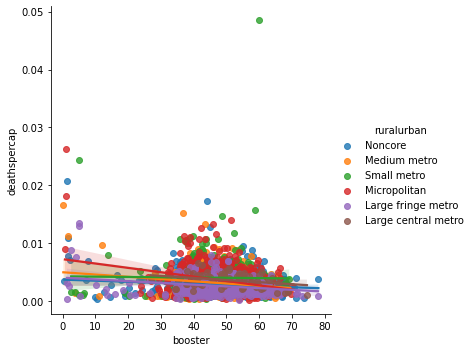

In [18]:
g = sns.lmplot(
    data=df,
    x="booster", y="deathspercap", hue="ruralurban",
    height=5
)

In [78]:
df = pd.DataFrame(list(zip(county, deathspercap, dose1, series, booster, pop, hsgrad, homeownership, under5, over65, female, black, white, percapincome, density, age)),
               columns =['county','deathspercap', 'dose1','series','booster','pop', 'hsgrad', 'homeownership', 'under5', 'over65', 'female', 'black', 'white', 'percapitaincome', 'density', 'age'])

LASSO

In [79]:
df

,county,deathspercap,dose1,series,booster,pop,hsgrad,homeownership,under5,over65,female,black,white,percapitaincome,density,age
0,AK Aleutians East Borough,NaN,86.9,74.9,41.2,3269.0,84.3,59.2,2.9,8.2,33.4,2.62,15.46,30891.70,0.4,42.5
1,AK Anchorage Municipality,0.002772,79.2,70.6,49.4,268042.0,93.3,61.7,7.4,9.4,49.2,2.74,59.19,38324.82,171.2,33.6
2,AK Bethel Census Area,0.002377,73.9,68.7,51.4,16410.0,80.9,61.3,10.5,7.1,47.7,0.33,10.17,17802.36,0.4,27.3
3,AK Denali Borough,NaN,65.6,55.5,53.1,2001.0,96.2,60.7,3.5,7.6,45.1,0.09,82.72,39316.88,0.1,42.1
4,AK Dillingham Census Area,NaN,59.3,53.5,49.1,4441.0,86.9,60.7,9.8,8.1,47.6,0.22,16.24,21804.82,0.3,30.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2828,WY Sublette County,0.001182,44.4,38.8,48.7,9306.0,95.3,73.6,6.3,15.3,45.8,0.00,89.23,28810.97,2.1,39.4
2829,WY Sweetwater County,0.002655,61.5,52.4,42.8,39546.0,90.7,73.7,7.2,9.7,47.8,0.41,79.64,30282.59,4.2,35.3
2830,WY Teton County,0.000851,95.0,95.0,50.9,22334.0,95.4,60.8,5.3,12.7,47.4,0.32,81.49,48557.37,5.3,39.3
2831,WY Uinta County,0.001219,62.8,53.6,42.4,18865.0,89.6,73.7,7.5,11.7,49.5,0.07,87.66,27048.12,10.1,35.8


In [80]:
varname=list(df.iloc[:,2:16].columns)
print(varname)
df=df.dropna()
df2 = df.iloc[:,1:].values

Y = df2[0:2585,:1] #
X = df2[0:2585,1:16]

['dose1', 'series', 'booster', 'pop', 'hsgrad', 'homeownership', 'under5', 'over65', 'female', 'black', 'white', 'percapitaincome', 'density', 'age']


In [81]:
Y

array([[0.00277195],
       [0.0023766 ],
       [0.00211888],
       ...,
       [0.00085072],
       [0.00121919],
       [0.00391574]])

In [82]:
X

array([[7.920000e+01, 7.060000e+01, 4.940000e+01, ..., 3.832482e+04,
        1.712000e+02, 3.360000e+01],
       [7.390000e+01, 6.870000e+01, 5.140000e+01, ..., 1.780236e+04,
        4.000000e-01, 2.730000e+01],
       [7.100000e+01, 6.380000e+01, 4.090000e+01, ..., 3.496882e+04,
        1.330000e+01, 3.130000e+01],
       ...,
       [9.500000e+01, 9.500000e+01, 5.090000e+01, ..., 4.855737e+04,
        5.300000e+00, 3.930000e+01],
       [6.280000e+01, 5.360000e+01, 4.240000e+01, ..., 2.704812e+04,
        1.010000e+01, 3.580000e+01],
       [4.810000e+01, 4.500000e+01, 5.110000e+01, ..., 2.749483e+04,
        3.800000e+00, 4.290000e+01]])

In [83]:
np.shape(X)

(2443, 14)

In [84]:
np.shape(Y)

(2443, 1)

In [85]:
print(np.any(np.isnan(X)))
print(np.all(np.isfinite(X)))

False
True


In [86]:
from sklearn.preprocessing import StandardScaler #usually, we want to standardize to put in terms of standard deviations. to minimize iimpact of measurement
SC = StandardScaler()
SC.fit(X) 
Xn=SC.transform(X) #use these statistic to standardize. Xn contains standardized x variables

In [87]:
from sklearn import linear_model
las1 = linear_model.Lasso(alpha=.05).fit(Xn,Y) # alpha is the tuning parameter
#alpha is lamda here. include X and Y

In [88]:
print(las1.coef_)
#later we'll do many lamda values. here we use one lamda value

[-0. -0. -0.  0. -0. -0.  0.  0.  0.  0. -0. -0.  0. -0.]


Computation of Lasso solution path

In [89]:
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from itertools import cycle

In [90]:
# Use "eps" to specify the length and density of the grid (eps = alpha_min / alpha_max)
eps = 1e-10  
alphas_lasso, coefs_lasso, _ = lasso_path(Xn, Y, eps = eps) #first, we need to select lamda values
#eps is one of the parameters to use for finding which lamda values to use
#eps chooses smallest lamda value
#eps = lamda min/ lamda max
#can use n_alphas to select number of alphas in regularization path
#alphas_lasso is lamdas that were used, coef is lasso estimates

In [91]:
coefs_lasso = coefs_lasso[0]

In [92]:
coefs_lasso

array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -5.55183948e-04, -5.55183949e-04, -5.55183950e-04],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         4.94291229e-04,  4.94291230e-04,  4.94291231e-04],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -3.44287901e-04, -3.44287901e-04, -3.44287901e-04],
       ...,
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         7.03358022e-05,  7.03358023e-05,  7.03358023e-05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.16822437e-04, -1.16822437e-04, -1.16822437e-04],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -3.18721558e-04, -3.18721558e-04, -3.18721558e-04]])

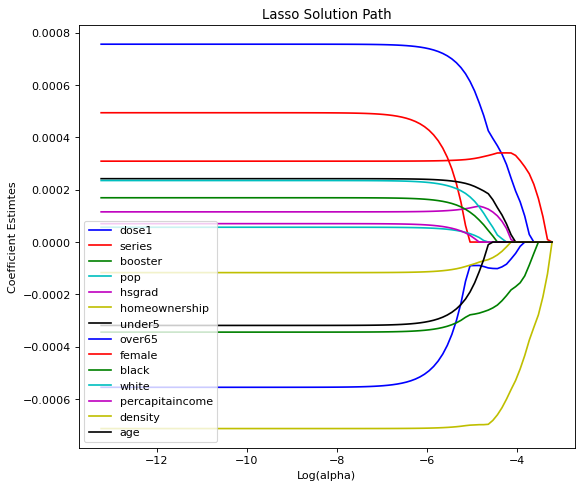

In [93]:
# Display the solution path
plt.figure(figsize=(8, 7), dpi=80) #define figure size
colors = cycle(['b', 'r', 'g', 'c','m', 'y', 'k']) #coloring lines. iterates colors. k is black

# Take the log of the alpha values to adjust the scale of X-axis
log_alphas_lasso = np.log10(alphas_lasso) #taking log of lamdas

# Use a for-loop to plot several paths on a figure 
for coef_l, c, vn in zip(coefs_lasso, colors, varname): #zip holds these functions temperarly. coeff lasso is parameter estimate, colors is the colors, varname is variable name.
    l1 = plt.plot(log_alphas_lasso, coef_l, c=c, label=vn) #drawing lines. coefff lasso starts with first row. 
    #in first iteragtion, selects first row of this object. then first item in color. variable name will be variable name.
    
plt.xlabel('Log(alpha)')
plt.ylabel('Coefficient Estimtes')
plt.title('Lasso Solution Path')
plt.legend()
plt.savefig('lassopath.png')
plt.show()
#log alpha negative because they're small numbers.

Selection of a Tuning Parameter Value in the LASSO using cv/bic/aic

cross validation

In [94]:
from sklearn.linear_model import LassoLarsCV, LassoLarsIC
import time

In [95]:
t1 = time.time() # Get the current time
lascv = LassoLarsCV(cv=5).fit(Xn, Y) #how many chunks you break the data into. use 5 or 10 folds, include x and y
t_lasso_lars_cv = time.time() - t1 # Calculate running time

/Users/lukastaylor/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Users/lukastaylor/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

-7.004133873272845


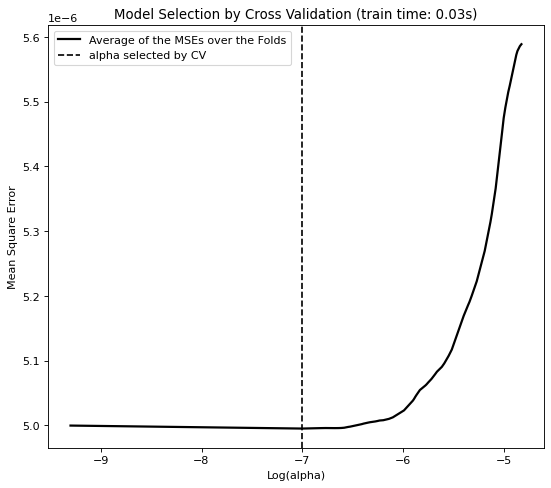

In [96]:
# Display the results
eps = 5e-10
lascv_log_alphas = np.log10(lascv.cv_alphas_ + eps)  #result variable.cv alphas is lamdas. alpha (singular) is lamda that is optimal. eps is different from what we used before. eps is just small number. include zero because taki9ng log of zero creates error
lascv_log_alpha = np.log10(lascv.alpha_) #log of lamda that minimized MSE
# Caution: lascv.alphas contains the alpha at the lowest MSE whereas lascv.cv_alphas_ contains the set of alphas used in the path
# The smallest value in lascv.cv_alphas_ is 0 so we add eps (a small number) to avoid log(0)

plt.figure(figsize=(8, 7), dpi=80)
plt.plot(lascv_log_alphas, lascv.mse_path_.mean(axis=1), 'k',
         label='Average of the MSEs over the Folds', linewidth=2)
plt.axvline(lascv_log_alpha, linestyle='--', color='k', #add verticle line at optimal lamda
            label='alpha selected by CV')
print(lascv_log_alpha)
plt.legend()

plt.xlabel('Log(alpha)')
plt.ylabel('Mean Square Error')
plt.title('Model Selection by Cross Validation (train time: %.2fs)'
          % t_lasso_lars_cv)
plt.show()

In [1]:
print(varname[0:5])
print(varname[6:-1])
print(lascv.coef_)

NameError: name 'varname' is not defined

'dose1','series','booster','pop', 'hsgrad', 'homeownership', 'under5', 'over65', 'female', 'black', 'white', 'percapitaincome', 'density', 'age'

deathspercap = intercept + 0 dose1 - 0.01533543 series + 0.00138256 booster - 0.00419773 pop + 0.01136944 hsgrad - 0.00768059 homeownership + 0.00605874 under5 + 0.00721449 over 65 - 0.00741574 female - 0.01255417 black - 0.02037425 white - 0.00223745 percapitaincome - 0.00020098 density + 0.01366274 age

aic and bic

In [98]:
lasic_bic = LassoLarsIC(criterion='bic').fit(Xn, Y) #specify which criterian. plug in x and y. store results in these two variables
lasic_aic = LassoLarsIC(criterion='aic').fit(Xn, Y)

/Users/lukastaylor/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Users/lukastaylor/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

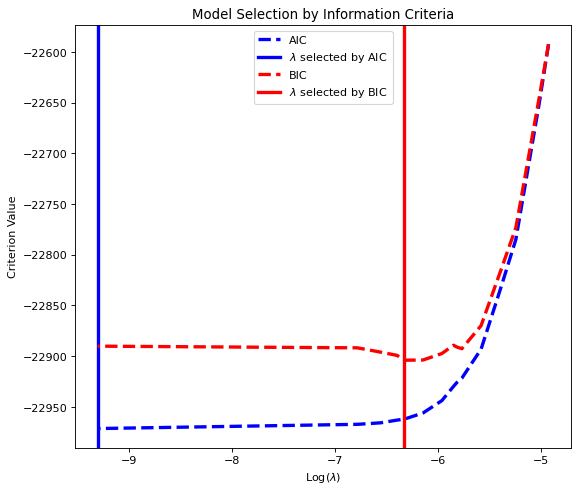

In [99]:
# Display results
# make a fn to produce figures with the same features repeatedly
def plot_ic_criterion(model, name, color): 
    alpha_ = model.alpha_ + eps #optimal lamda
    alphas_ = model.alphas_ + eps #lamdas that were used in this function
    criterion_ = model.criterion_ # BIC or AIC values over the alpha values
    plt.plot(np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s' % name)
    plt.axvline(np.log10(alpha_), color=color, linewidth=3, #adding vertical line
                label='$\lambda$ selected by %s ' % name)
    plt.xlabel('Log($\lambda$)')
    plt.ylabel('Criterion Value')
    

plt.figure(figsize=(8, 7), dpi=80)
plot_ic_criterion(lasic_aic, 'AIC', 'b') #line is AIC result
plot_ic_criterion(lasic_bic, 'BIC', 'r') #line is BIC result
plt.legend()
plt.title('Model Selection by Information Criteria')
#plt.show()
plt.savefig('lasso.png')

In [100]:
print(varname)
print("aic model is",lasic_aic.coef_)
print("bic model is",lasic_bic.coef_)

['dose1', 'series', 'booster', 'pop', 'hsgrad', 'homeownership', 'under5', 'over65', 'female', 'black', 'white', 'percapitaincome', 'density', 'age']
aic model is [-5.55183953e-04  4.94291234e-04 -3.44287902e-04  5.66178347e-05
  1.15383131e-04 -7.12936012e-04  2.42197672e-04  7.56308059e-04
  3.09220378e-04  1.69311947e-04  2.35118928e-04  7.03358026e-05
 -1.16822437e-04 -3.18721559e-04]
bic model is [-1.00062442e-04  0.00000000e+00 -2.59079700e-04  0.00000000e+00
  1.24663815e-04 -6.96352011e-04  1.82968203e-04  4.15416623e-04
  3.31511631e-04  4.05509278e-05  7.76184577e-05  0.00000000e+00
 -6.65806612e-05  0.00000000e+00]


Forwards and Backwards Selection

In [101]:
ncol=X.shape[1]
ncol

14

In [102]:
pcand = list(range(ncol)) # A list to keep track of the remaining predictors (i.e., not yet added) at each iteration
psel = [] # A list to keep track of the selected predictors at each iteration (the order of the selected predictors)
tb = np.zeros(ncol) # A vector to store the BIC of the selected model (combination) at each iteration
p = 0 # Iteration idex
print(pcand)

while len(psel) != ncol: # Repeat below until the model includes all the predictors
    tb0 = np.zeros((len(pcand),2)) # Store the Rsquare(s) and BIC(s) of the models considered at each iteration

    for i in range(0,len(pcand)):
        psel0 = psel + [pcand[i]] # "psel0" is a temporary version of psel which includes one of the predictors in pcan and those in psel
        # Caution: "+" combines two lists, but not a list and an integer (i.e pcan[i])
        XX = X[:,psel0]
        XX = sm.add_constant(XX)
        model = sm.OLS(Y, XX)
        res = model.fit()
        tb0[i,:] = [res.rsquared, res.bic]
    
    ind = np.argmax(tb0[:,0]) # Find the regressor that results in the largest Rsquare when added to the model
    psel = psel + [pcand[ind]] # Add the selected regressor to psel
    pcand.remove(pcand[ind]) # Remove the selected regressor from pcand
    tb[p] =  tb0[ind,1] # Store the BIC of the selected model at this iteration
    p += 1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [103]:
psel

[5, 8, 7, 2, 13, 10, 6, 9, 4, 12, 3, 0, 1, 11]

In [104]:
selected = psel[:(np.argmin(tb)+1)]
for i in selected:
    print(varname[i])

homeownership
female
over65
booster
age
white


In [105]:
OLS3 = smf.ols('deathspercap ~ homeownership + female + over65 + booster + age + white', data=df).fit()
print("AIC is", OLS3.aic)
print("BIS is", OLS3.bic)
print("R-Squared is", OLS3.rsquared_adj)
print(OLS3.summary())

AIC is -22954.228946072253
BIS is -22913.62207157345
R-Squared is 0.13039123015446286
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     62.03
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           8.24e-72
Time:                        14:34:55   Log-Likelihood:                 11484.
No. Observations:                2443   AIC:                        -2.295e+04
Df Residuals:                    2436   BIC:                        -2.291e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [46]:
tb

array([-22762.80571707, -22842.47537463, -22875.76365691, -22907.14248601,
       -22911.12149022, -22913.62207157, -22912.90159596, -22912.58079572,
       -22910.16308115, -22905.54513355, -22899.01994019, -22892.6584987 ,
       -22889.21894471, -22882.38000747])

In [47]:
pcand = list(range(ncol)) # A list to keep track of the remaining predictors (i.e., not yet added) at each iteration
psel = list(range(ncol)) # A list to keep track of the selected predictors at each iteration (the order of the selected predictors)
tb = np.zeros(ncol) # A vector to store the BIC of the selected model (combination) at each iteration
p = 0 # Iteration idex
removelist = []


while p != ncol: # Repeat below until the model includes all the predictors
    tb0 = np.zeros((len(pcand),2)) # Store the Rsquare(s) and BIC(s) of the models considered at each iteration

    for i in range(0,len(pcand)):
        psel0 = psel
        #np.delete(psel0, pcand[i])
        psel0.remove(pcand[i])
        #psel0 = psel + [pcand[i]] # "psel0" is a temporary version of psel which includes one of the predictors in pcan and those in psel
        # Caution: "+" combines two lists, but not a list and an integer (i.e pcan[i])
        XX = X[:,psel0]
        XX = sm.add_constant(XX)
        model = sm.OLS(Y, XX)
        res = model.fit()
        tb0[i,:] = [res.rsquared, res.bic]
        psel.insert(0, pcand[i])
        psel.sort()


        #psel = psel + [pcand[i]]
        
    
    ind = np.argmax(tb0[:,0]) # Find the regressor that results in the largest Rsquare when added to the model
    psel.remove(pcand[ind])
    
    removelist.append(pcand[ind])
    pcand.remove(pcand[ind]) # Remove the selected regressor from pcand
    tb[p] =  tb0[ind,1] # Store the BIC of the selected model at this iteration
    p += 1

In [48]:
tb

array([-22889.21894471, -22895.54720839, -22899.75369839, -22903.85081657,
       -22910.16308115, -22912.58079572, -22913.09375893, -22915.02806583,
       -22909.53819178, -22907.14248601, -22875.76365691, -22842.47537463,
       -22762.80571707, -22613.10205103])

In [49]:
removelist[:(np.argmin(tb)+1)]

[11, 3, 12, 1, 0, 4, 13, 9]

In [50]:
removelist

[11, 3, 12, 1, 0, 4, 13, 9, 10, 6, 2, 7, 8, 5]

K-Means Clustering

In [51]:
X=df.iloc[:,2:5]
X

,dose1,series,booster
1,79.2,70.6,49.4
2,73.9,68.7,51.4
5,71.0,63.8,40.9
6,86.9,79.5,59.4
7,55.5,49.9,51.8
...,...,...,...
2828,44.4,38.8,48.7
2829,61.5,52.4,42.8
2830,95.0,95.0,50.9
2831,62.8,53.6,42.4


In [52]:
from sklearn.cluster import KMeans
KMres = KMeans(n_clusters=3, random_state=0).fit(X)
y_pred = KMres.predict(X)

In [53]:
y_pred 

array([2, 2, 1, ..., 2, 1, 0], dtype=int32)

In [54]:
X.iloc[:,0]

1       79.2
2       73.9
5       71.0
6       86.9
7       55.5
        ... 
2828    44.4
2829    61.5
2830    95.0
2831    62.8
2832    48.1
Name: dose1, Length: 2443, dtype: float64

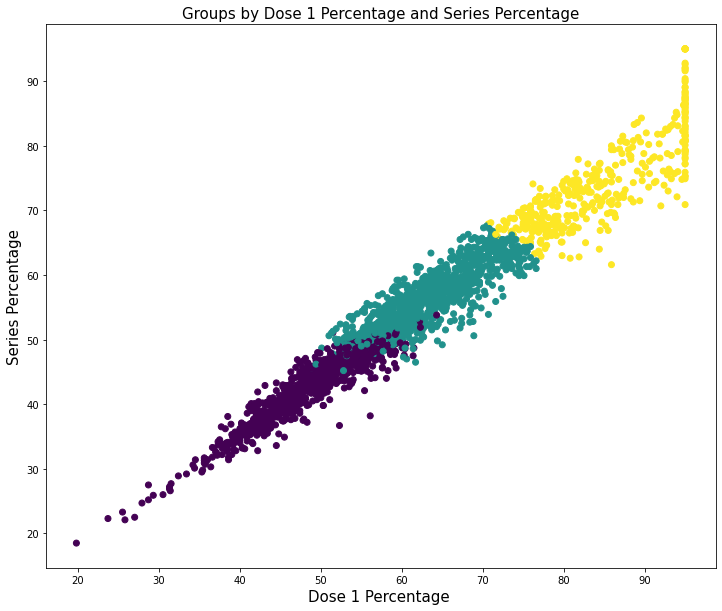

In [55]:
# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_pred) 

    
plt.xlabel('Dose 1 Percentage ',fontsize = 15)
plt.ylabel('Series Percentage',fontsize = 15)
plt.title('Groups by Dose 1 Percentage and Series Percentage',fontsize = 15)
    
plt.show()

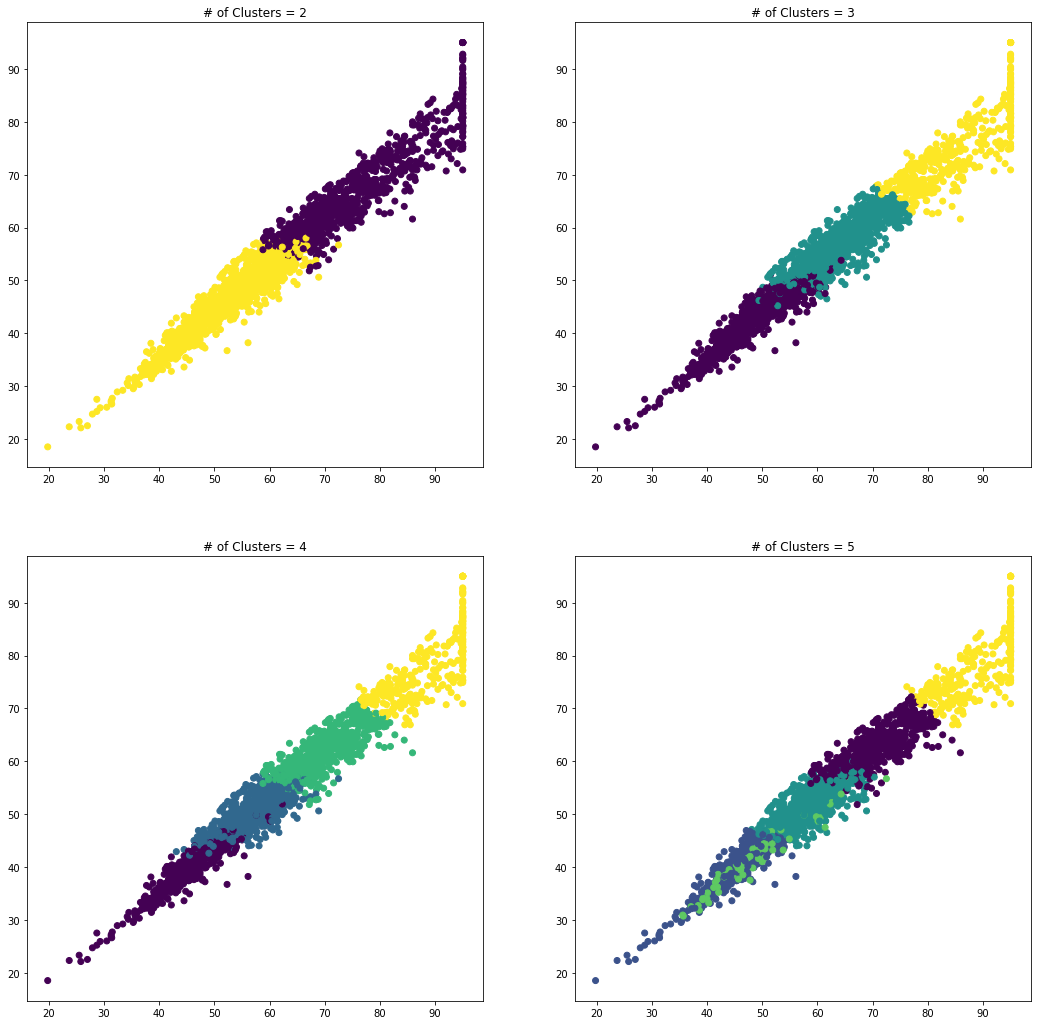

In [56]:
plt.figure(figsize=(18, 18))

for i in range(1,5):
    plt.subplot(2,2,i)
    KMres = KMeans(n_clusters=i+1, random_state=0).fit(X)
    y_pred = KMres.predict(X)
    
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_pred)
    plt.title("# of Clusters = %d" %(i+1))
    
    #for i, txt in enumerate(df.iloc[:, 0]):
        #plt.annotate(txt, (X.iloc[i,0], X.iloc[i,1]),size=10)
        
plt.show()

Dendogram

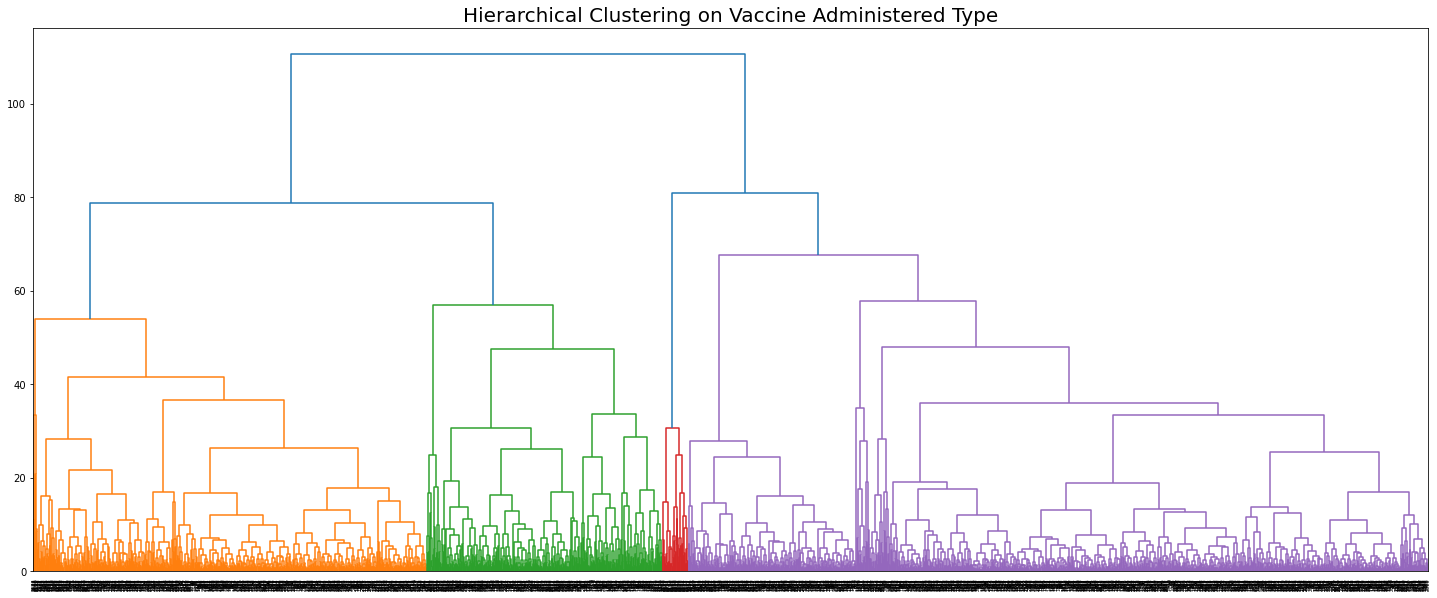

In [57]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(X, 'complete') 

plt.figure(figsize=(25, 10))
hierarchy.dendrogram(Z,
                     #leaf_rotation=90,  # rotate the labels on X-axis
                     #leaf_font_size=12,
                     )
                     
plt.title('Hierarchical Clustering on Vaccine Administered Type', size=20)           
plt.show()

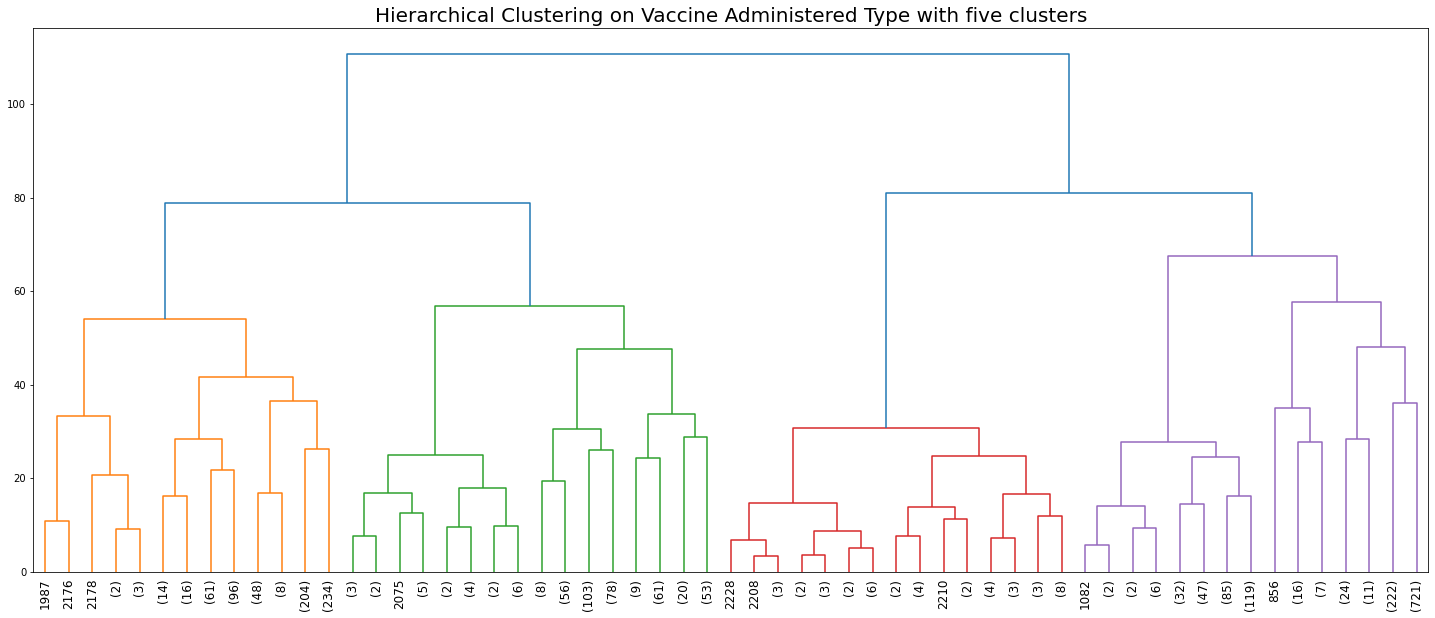

In [58]:
plt.figure(figsize=(25, 10))
hierarchy.dendrogram(Z,
                     truncate_mode='level', # The other option: 'lastp' - show only p branches
                     p = 5, # number of clusters
                     leaf_rotation=90,
                     leaf_font_size=12,
                     
                     )
                     
plt.title('Hierarchical Clustering on Vaccine Administered Type with five clusters', size=20)          
plt.show()

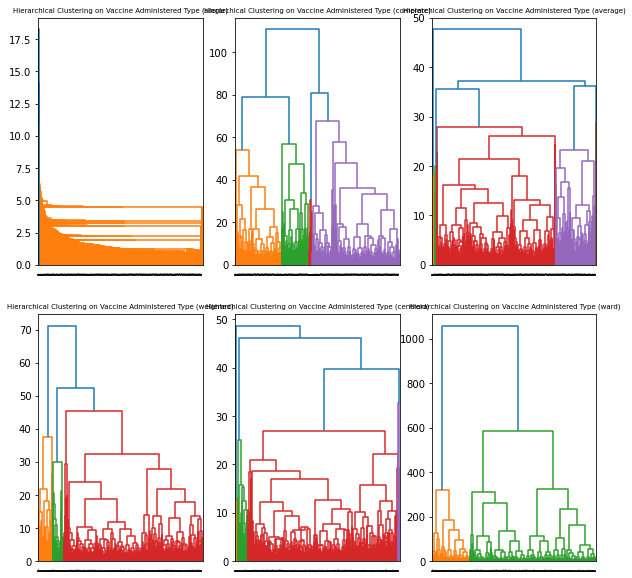

In [59]:
plt.figure(figsize=(10, 10))
from matplotlib import gridspec

#f = plt.figure(figsize=(10,3))
#ax = f.add_subplot(121)

for i in range(1,7):
    
    plt.subplot(2,3,i)
    
    if i == 1:
        Z = hierarchy.linkage(X, 'single') 
    elif i == 2:
        Z = hierarchy.linkage(X, 'complete') 
    elif i == 3:
        Z = hierarchy.linkage(X, 'average') 
    elif i == 4:
        Z = hierarchy.linkage(X, 'weighted') 
    elif i == 5:
        Z = hierarchy.linkage(X, 'centroid')
    elif i == 6:
        Z = hierarchy.linkage(X, 'ward') 
    


    hierarchy.dendrogram(Z,
                         leaf_rotation=90,  # rotate the labels on X-axis
                         leaf_font_size=.2,
                         )

    
    if i == 1:
        plt.title('Hierarchical Clustering on Vaccine Administered Type (single)', size=7)  
    elif i == 2:
        plt.title('Hierarchical Clustering on Vaccine Administered Type (complete)', size=7)
    elif i == 3:
        plt.title('Hierarchical Clustering on Vaccine Administered Type (average)', size=7) 
    elif i == 4:
        plt.title('Hierarchical Clustering on Vaccine Administered Type (weighted)', size=7)  
    elif i == 5:
        plt.title('Hierarchical Clustering on Vaccine Administered Type (centroid)', size=7) 
    elif i == 6:
        plt.title('Hierarchical Clustering on Vaccine Administered Type (ward)', size=7) 
        
plt.show()

Making dummy groups

In [60]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print(kmeans.labels_)
print(np.shape(X))
dummies = X.iloc[0:X.shape[0],1:4]
ncol=X.shape[0]
print("ncol", ncol)
x=0
z=0
for n in range(X.shape[0]):
    dummies.iloc[n,0] = kmeans.labels_[n]
print(dummies)
    

[2 2 1 ... 2 1 0]
(2443, 3)
ncol 2443
      series  booster
1        2.0     49.4
2        2.0     51.4
5        1.0     40.9
6        2.0     59.4
7        1.0     51.8
...      ...      ...
2828     0.0     48.7
2829     1.0     42.8
2830     2.0     50.9
2831     1.0     42.4
2832     0.0     51.1

[2443 rows x 2 columns]


In [61]:
for n in range(X.shape[0]):
    dummies.iloc[n,1] = 0
    if dummies.iloc[n,0] == 2:
        dummies.iloc[n,0] = 0
        dummies.iloc[n,1] = 1

In [62]:
print(dummies)

      series  booster
1        0.0      1.0
2        0.0      1.0
5        1.0      0.0
6        0.0      1.0
7        1.0      0.0
...      ...      ...
2828     0.0      0.0
2829     1.0      0.0
2830     0.0      1.0
2831     1.0      0.0
2832     0.0      0.0

[2443 rows x 2 columns]


In [63]:
group2 = []
group3 = []
for n in range(X.shape[0]):
    group2.append(dummies.iloc[n,0])
    group3.append(dummies.iloc[n,1])

In [64]:
df = pd.DataFrame(list(zip(deathspercap, group2, group3)),
               columns =['deathspercap','group2', 'group3'])

Running regression based off dummy groups

In [65]:
OLS3 = smf.ols('deathspercap ~ group2 + group3', data=df).fit()
print("AIC is", OLS3.aic)
print("BIS is", OLS3.bic)
print("R-Squared is", OLS3.rsquared_adj)
print(OLS3.summary())

AIC is -20157.386697334143
BIS is -20140.374012840057
R-Squared is -0.0007035995613160484
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2463
Date:                Wed, 07 Dec 2022   Prob (F-statistic):              0.782
Time:                        14:07:38   Log-Likelihood:                 10082.
No. Observations:                2145   AIC:                        -2.016e+04
Df Residuals:                    2142   BIC:                        -2.014e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [66]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
dummies = df.iloc[0:X.shape[0],1:6]
ncol=X.shape[0]
for n in range(X.shape[0]):
    dummies.iloc[n,0] = kmeans.labels_[n]
for n in range(X.shape[0]):
    if dummies.iloc[n,0] == 0:
        dummies.loc[n,0] = 0
        dummies.loc[n,1] = 0
        dummies.loc[n,2] = 0
        dummies.loc[n,3] = 0
    elif dummies.iloc[n,0] == 1:
        dummies.iloc[n,0] = 1
        dummies.iloc[n,1] = 0
        dummies.iloc[n,2] = 0
        dummies.iloc[n,3] = 0
    elif dummies.iloc[n,0] == 2:
        dummies.iloc[n,0] = 0
        dummies.iloc[n,1] = 1
        dummies.iloc[n,2] = 0
        dummies.iloc[n,3] = 0
    elif dummies.iloc[n,0] == 3:
        dummies.iloc[n,0] = 0
        dummies.iloc[n,1] = 0
        dummies.iloc[n,2] = 1
        dummies.iloc[n,3] = 0
    elif dummies.iloc[n,0] == 4:
        dummies.iloc[n,0] = 0
        dummies.iloc[n,1] = 0
        dummies.loc[n,2] = 0
        dummies.loc[n,3] = 1
    else:
        print("error: n out of range")
group2 = []
group3 = []
group4 = []
group5 = []
for n in range(X.shape[0]):
    group2.append(dummies.iloc[n,0])
    group3.append(dummies.iloc[n,1])
    group4.append(dummies.iloc[n,2])
    group5.append(dummies.iloc[n,3])

for n in range(X.shape[0]):
    if dummies.iloc[n,0] == 3:
        group4.append(dummies.iloc[n,1])
    
df = pd.DataFrame(list(zip(deathspercap, group2, group3, group4, group5)),
               columns =['deathspercap','group2', 'group3', 'group4', 'group5'])
OLS3 = smf.ols('deathspercap ~ group2 + group3 + group4 + group5', data=df).fit()
print("AIC is", OLS3.aic)
print("BIS is", OLS3.bic)
print("R-Squared is", OLS3.rsquared_adj)
print(OLS3.summary())

AIC is -20153.404740867758
BIS is -20125.050266710947
R-Squared is -0.0016304109161724423
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1275
Date:                Wed, 07 Dec 2022   Prob (F-statistic):              0.972
Time:                        14:07:38   Log-Likelihood:                 10082.
No. Observations:                2145   AIC:                        -2.015e+04
Df Residuals:                    2140   BIC:                        -2.013e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------